<a href="https://colab.research.google.com/github/Abhi10699/google-colab-playground/blob/main/immuse_net_model_vgg_16_abhi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!unzip images.zip -d ./images/

Archive:  images.zip
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of images.zip or
        images.zip.zip, and cannot find images.zip.ZIP, period.


In [ ]:
import pandas as pd
import numpy as np
import os
import cv2

from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet import ResNet101, ResNet152, ResNet50
from tensorflow.keras.applications.inception_v3 import

from tensorflow.keras.callbacks import ModelCheckpoint


from sklearn.model_selection import train_test_split



# only positive, only energy, positive + energetic, high/low
# labels = {
#     "dance_party": [1,1,1,1],
#     "gloomy": [0,0,1,0],
#     "foggy": [1,0,0,0],
#     "frustrated": [0,1,0,0],
#     "sad": [0,0,1,0],
# }


"""
  1 -> positive and energetic
  2 -> not positive not energetic
  3 -> positive but not energetic
  4 -> energetic but not positive
"""

labels = {
    "dance_party": [1,0,0,0],
    "gloomy": [0,1,0,0],
    "foggy": [0,0,1,0],
    "frustrated": [0,0,0,1],
    # "sad":[0,1,0,0],
}


images_dir = "./images/"
items = os.listdir(images_dir)

images_arr = []
classes = []

for item in items:
    if item in ["iceland","sad"]:
        continue
    else:
        subfolder = f"{images_dir}{item}"
        image_class = labels[item]
        images = os.listdir(subfolder)
        for image in images:
            image_path = f"{subfolder}/{image}"
            image_data = cv2.imread(image_path)
            image_data = cv2.resize(image_data, (256, 256))
            imaeg_data = image_data / 255.0
            images_arr.append(image_data)

            classes.append(image_class)


images_arr = np.array(images_arr)
classes = np.array(classes)

print(images_arr.shape, classes.shape)

(1160, 256, 256, 3) (1160, 4)


In [ ]:
# splits
x_train, x_test, y_train, y_test = train_test_split(images_arr, classes, shuffle=True,train_size=0.75)

# Transfer Learning

In [ ]:
# modelling

model = VGG16(
    input_shape=[256,256,3],
    weights='imagenet',
    include_top=False,
    classes=4,
)

for layer in model.layers:
  layer.trainable = False

# checkpoint_callback= ModelCheckpoint(
#     "./model-v2/",
#     save_best_only=True,
#     save_weights_only=True,
#     save_freq='epoch'
# )

# model.fit(x_train, y_train, epochs=10, validation_data=[x_test, y_test])

In [ ]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
xrf = model.predict(x_train)

36/36 [==============================] - 6s 173ms/step


### Random Forest Regressor

In [ ]:
rf = RandomForestClassifier(n_estimators=25, max_depth=6)
xrf = xrf.reshape(xrf.shape[0],-1)
rf.fit(xrf, y_train)

RandomForestClassifier(max_depth=6, n_estimators=25)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
test_preds = rf.predict(xrf)
print(accuracy_score(test_preds, y_train))
# test_pred

0.9175438596491228


In [ ]:
# from sklearn.metrics import accuracy_score, confusion_matrix

test_feats = model.predict(x_test)
test_feats = test_feats.reshape(test_feats.shape[0],-1)
test_preds = rf.predict(test_feats)
print(accuracy_score(test_preds, y_test))

12/12 [==============================] - 2s 173ms/step
0.6789473684210526


In [ ]:
for idx, prd in enumerate(test_preds[:10]):
  print(prd, y_test[idx])

4 1
1 2
1 1
3 3
4 1
3 2
4 4
1 1
3 3
4 4


## Full Training

In [ ]:
model = VGG16(
    input_shape=[256,256,3],
    weights=None,
    include_top=True,
    classes=4,
    classifier_activation = None
)

# checkpoint_callback= ModelCheckpoint(
#     "./model-v2/",
#     save_best_only=True,
#     save_weights_only=True,
#     save_freq='epoch'
# )


model.compile(optimizer="sgd",loss="categorical_crossentropy")
# print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)
model.fit(x_train, y_train, epochs=4, validation_data=[x_test, y_test])

Epoch 1/4
28/28 [==============================] - 19s 576ms/step - loss: 5.7895 - val_loss: 5.3788
Epoch 2/4
28/28 [==============================] - 17s 594ms/step - loss: 5.6362 - val_loss: 5.3356
Epoch 3/4
28/28 [==============================] - 15s 555ms/step - loss: 5.6321 - val_loss: 5.3356
Epoch 4/4
28/28 [==============================] - 17s 595ms/step - loss: 5.6321 - val_loss: 5.3356


In [ ]:
model.evaluate(x_test, y_test)

10/10 [==============================] - 1s 142ms/step - loss: 5.3356


5.335646152496338

In [ ]:
import keras.utils as image
import matplotlib.pyplot as plt

def infer(image_path):

  test_img = image.load_img(image_path,color_mode='rgb', target_size=(256, 256))
  x = image.img_to_array(test_img) / 255.0

  # show image
  plt.imshow(x)

  x = np.expand_dims(x, axis=0)
  preds = model.predict(x)
  preds = np.argmax(preds)

  return preds

1/1 [==============================] - 0s 254ms/step


3

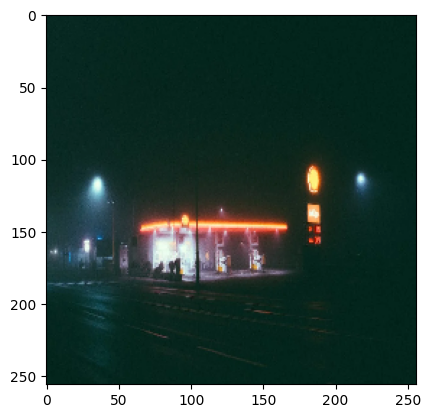

In [ ]:
infer("./1.jpeg")

1/1 [==============================] - 0s 31ms/step


3

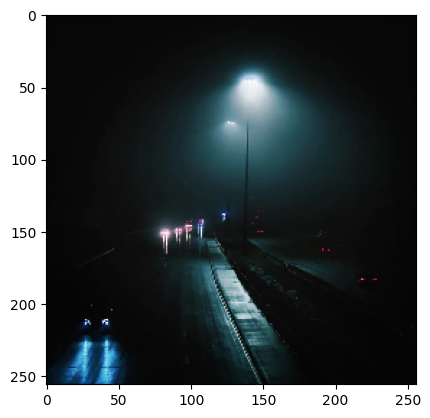

In [ ]:
infer("./2.webp")

1/1 [==============================] - 0s 29ms/step


3

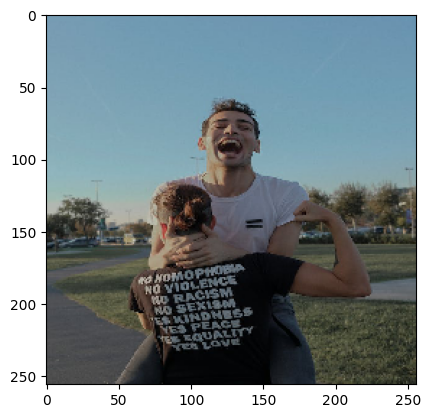

In [ ]:
infer("./3.jpeg")

# Recommending Songs

In [ ]:
import pandas as pd
import pickle

In [ ]:
rec_sys = pickle.load(open("/content/music_recsys_v1.pickle-val-energy-pos","rb"))
df = pd.read_csv("./spotify_200K.csv")

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator NearestNeighbors from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [ ]:
import keras.utils as image

def infer(image_path):
  # model.load_weights(weights)
  test_img = image.load_img(image_path,color_mode='rgb', target_size=(256, 256))
  x = image.img_to_array(test_img)
  x = np.expand_dims(x, axis=0)
  preds = model.predict(x)
  val = preds[0][0]
  energy = preds[0][1]
  acs = 1 - (energy + val)
  prds = rec_sys.kneighbors([[val, energy, acs]], return_distance=False)[0]
  print([[val, energy, acs]])
  for idx in prds:
    try:
      song = df.iloc[idx]
      print(f"https://open.spotify.com/track/{song['track_uri'].split(':')[2]}")
    except:
      pass

In [ ]:
infer("./abhi.webp")

1/1 [==============================] - 0s 21ms/step
[[0.52151674, 0.49468896, -0.016205668449401855]]
https://open.spotify.com/track/5I54KutlUcBNmh0hmuAOy4
https://open.spotify.com/track/1Vm4cPqMS50k2zM70viOOl


In [ ]:
df.shape

(22168, 26)

In [ ]:
import keras.utils as image

def infer(image_path):
  # model.load_weights(weights)
  test_img = image.load_img(image_path,color_mode='rgb', target_size=(256, 256))
  x = image.img_to_array(test_img)
  x = np.expand_dims(x, axis=0)
  preds = model.predict(x)
  print(preds)

In [ ]:
infer("./image.jpeg")

1/1 [==============================] - 1s 937ms/step
[[0.63591367 0.30835837]]


In [ ]:
infer("./abhi.webp")

1/1 [==============================] - 0s 26ms/step
[[0.62069273 0.27034956]]


In [ ]:
infer("./happy.jpeg")

1/1 [==============================] - 0s 26ms/step
[[0.9576639  0.42633837]]


In [ ]:
infer("./road.jpeg")

1/1 [==============================] - 0s 26ms/step
[[0.99719787 0.11922711]]


In [ ]:
infer("./pexel.jpg")

1/1 [==============================] - 0s 32ms/step
[[0.8135116  0.18859088]]
